# <center> BREAST CANCER PREDICTION

## Abstract 

One critical application of machine learning is breast cancer prediction, to improve early detection and patient outcomes. I have employed several machine learning approaches, both traditional classifiers and cutting-edge neural networks, to predict breast cancer using the Breast Cancer Wisconsin (Diagnostic) Dataset. The aim is to attain high accuracy in differentiating between benign and malignant tumors. Based on the results, extensive analysis of various models reveals that neural networks are a strong choice, with a testing accuracy rate as high as 98.25% and an F1 score of up to 0.96%.

## Introduction

Breast cancer is one of the most common life-threatening diseases afflicting women worldwide. This form of cancer is the most widespread among women, accounting for about one-quarter of all forms. Breast-cancer victims numbered more than 2.1 million in 2015 alone. The onset of the disease begins when cells in breast tissue divide out of control, resulting either from X-ray examinations or palpable lumps in one's breasts.

The key challenge in combatting breast cancer lies in accurately classifying tumors into two categories: malignant (cancerous) or benign (non-cancerous). Classification into this category is very important to the question of what medical treatment should be given. Support Vector Machines (SVMs) are an example of machine learning methods that can be used to automate this classification process. The Breast Cancer Wisconsin (Diagnostic) Dataset includes a range of features from breast biopsies, and those can be used to train machine learning models that probe for the unique patterns found in malignant or benign tumors.

Analysis of this data set is essential to improving both the accuracy and speed with which breast cancer can be diagnosed. By employing machine learning methods, doctors could improve the efficiency of tumor identification, and thus speed effective medical care. The purpose of this code is to explore the analysis of the Breast Cancer Wisconsin (Diagnostic) Dataset with a range of machine-learning models, and thus offer an effective method for automatic tumor classification that can support early detectionand management efforts against breast cancer.

## About Dataset

As the most common type of cancer for women around this world, breast cancer takes up a quarter slice from among all others. In 2015 alone it affected over two million people worldwide and caused nearly half a million deaths numerous places in life. It all starts when cells inside the breast begin to proliferate wildly, creating tumors that can be seen as lumps in the breasts with X-rays or by palpitating.

The greatest hurdle faced in all efforts to fight breast cancer is correctly identifying tumors as malignant or benign. In order to overcome the difficulty, this analysis relies on SVMs (support vector machine) and uses Breast Cancer Wisconsin Diagnostic Dataset for data training. The dataset includes various vital features including radius, texture, perimeter, area, smoothness and compactness as well as concavities and point of inflection. These features can be used as the basis for a model that would allow computers to automatically classify breast tumors.

The ultimate purpose of this kind of analysis is to promote the development of methods for screening breast cancer, using machine learning (SVMs) and tumor characteristic features. In this way, the research hopes to further improve and refine breast cancer screening, thereby allowing affected persons even more timely access to medical care.

## Import libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
import sys
!{sys.executable} -m pip install lightgbm
from lightgbm import LGBMClassifier
from sklearn.metrics  import f1_score, accuracy_score, classification_report, confusion_matrix, recall_score, precision_score
from tensorflow import keras
tf.random.set_seed(3)

  Using cached lightgbm-4.1.0-py3-none-win_amd64.whl (1.3 MB)


Reading the dataset:

In [7]:
data=pd.read_csv('breast-cancer.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Summary

The code imports many Python libraries for performing data analysis, visualization, applying and evaluating machine learning models. The key libraries used in this script include:

- **NumPy and Pandas**: These libraries provide essential tools for data manipulation and analysis. In comparison, NumPy supports large-scale multi-dimensional arrays and matrices; Pandas also provides data structures such as DataFrames for handling structured information.

- **Matplotlib and Seaborn**: These libraries of images are used for development informative plots and charts. Seaborn is a plotting library which has been made based on the versatile matplotlib, adding extra aesthetic functions and statistical graphics.

- **TensorFlow and Keras**: grief Keras is an interface to TensorFlow, the most popular open-source machine learning library. Keras is employed in the code to create a neural network for breast cancer prediction.

- **Scikit-learn**: This library offers a rich collection of tools for machine learning applications, including data preparation, model selection and performance assessment. The respective models are imported from Scikit-learn, including Classifiers like Logistic regression, Support vector machine and K - nearest neighbors; Regressions such as Decision Tree or Random Forest etc.

- **LightGBM and XGBoost**: These are gradient boosting frameworks optimized for speed and precision. The machine learning models employed are LightGBM and XGBoost, for breast cancer prediction.

- **Sys and Warnings**: It uses the sys library to obtain some variables inside of the Python interpreter, and elides warning messages when running code.

Altogether these libraries let the script hold data effectively, analyze visual patterns and implement a number of machine learning models for comparison with one another relating to breast cancer early detection. Furthermore, the code employs special libraries for metrics visualization and confusion matrix analysis that increase clarity of presentation.

## Primary Data Analysis

Following are the columns of the dataset:

In [8]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Dataset Information
It has 569 rows with 32 columns. These columns contain information on various features of breast cancer.

The id column is an integer type.
The 'diagnosis' column is of type object.
The columns that remain (from 'radius_mean' to 'fractal dimenionworst ') are all float64.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Target Variable Distribution
The 'diagnosis' column has two classes:

'B' (Benign): 357 instances
'M' (Malignant): 212 instances
2.1 Diagnosis Count Visualization

In [10]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Descriptive Statistics

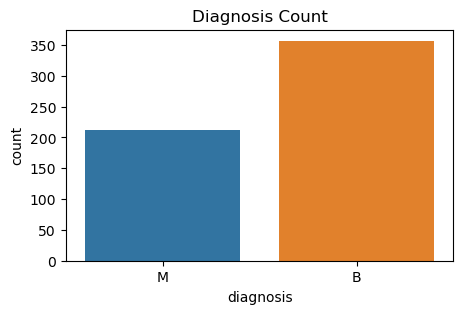

In [11]:
# Count of Diagnosis (M = Malignant, B = Benign)
plt.figure(figsize=(5,3))
sns.countplot(x='diagnosis', data=data)
plt.title('Diagnosis Count')
plt.show()

In [12]:
data.groupby(data.diagnosis).mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


There were no missing values in any of the columns.


In [13]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

The data set has no redundancies.

In [14]:
data.duplicated().sum()

0

The initial understanding of the dataset taken from this primary data analysis is in terms of its overall structure, distribution among target variables and key descriptive statistics. This provides the basis for research and model building.

In [15]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Summary

The initial analysis of a data set is to familiarize oneself with it, and so the first step of analyzing Breast Cancer Wisconsin (Diagnostic), as its name implies, was an in-depth examination. The data contains numerous characteristics extracted from breast biopsies, all of which are designed to help identify whether a tumor is malignant or benign. First, it involves an analysis of the structure of a specified dataset. You'll learn all about its columns and so forth. A list of diagnoses (Mallignant and Benign) shows the breakdown by class. Seeing is believing The bar plot indicates the frequencies of different diagnoses. Comparisons are made of mean values of features on the basis of diagnosis, which helps to shed light upon patterns. Next, the quality of all data in the dataset is carefully checked for such things as missing values and duplicate entries. To understand the central tendencies of and differences in the data, descriptive statistics as well as distribution plots are created. Part of exploratory data analysis is pair plots for selected variables, a correlation heatmap depicting feature relationships and distribution curves showing the characteristics of mean features. Generally speaking, this primary data analysis is helpful for all the following steps in machine learning. We can get to know more about our dataset based on its structure and nature.

## Exploratury Data Analysis

Relationship Overview--Pairplot
The mean features of the breast cancer pairs are connected with a pairplot. The pairplot includes the following variables: 'radius_mean,' 'texture_mean,' and other characteristics such as area, perimeter, smoothness by color (red = Malignant; blue = Benign).


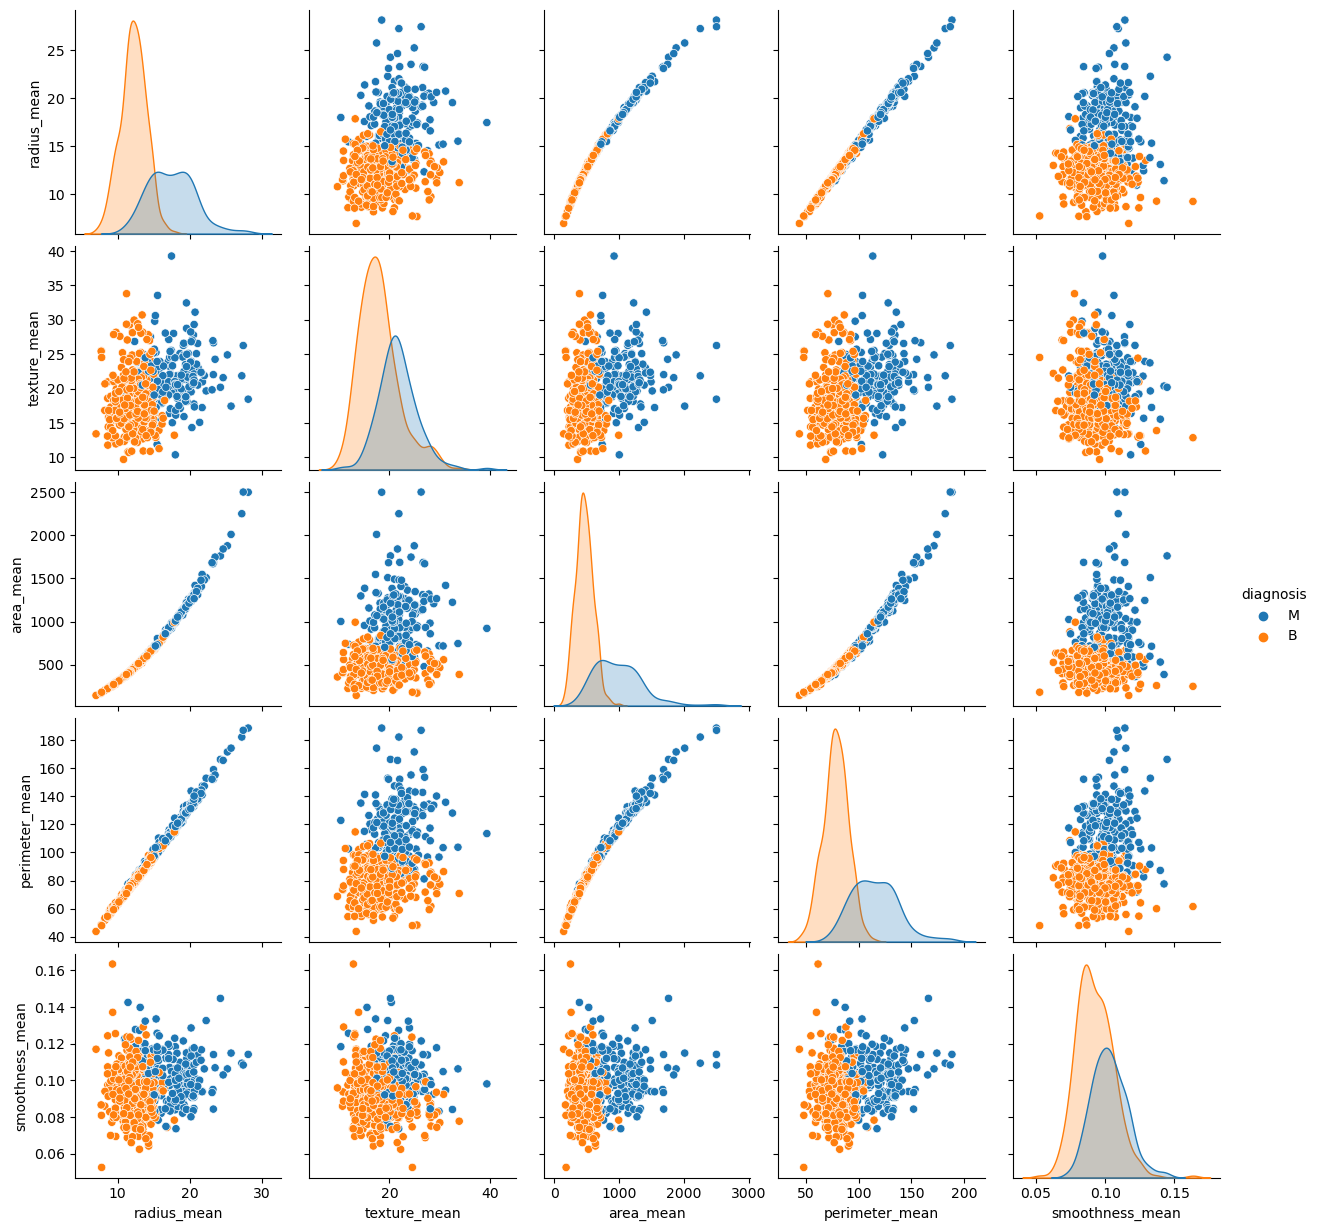

In [16]:
# Pairplot for a quick overview of relationships between variables
sns.pairplot(data, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'area_mean', 'perimeter_mean',"smoothness_mean"])
plt.show()

Correlation Heatmap
The correlation between various features is then displayed as a heatmap. A heatmap shows the intensity and orientation of relationships between variables. Values close to 1 or -1 suggest strong correlations.


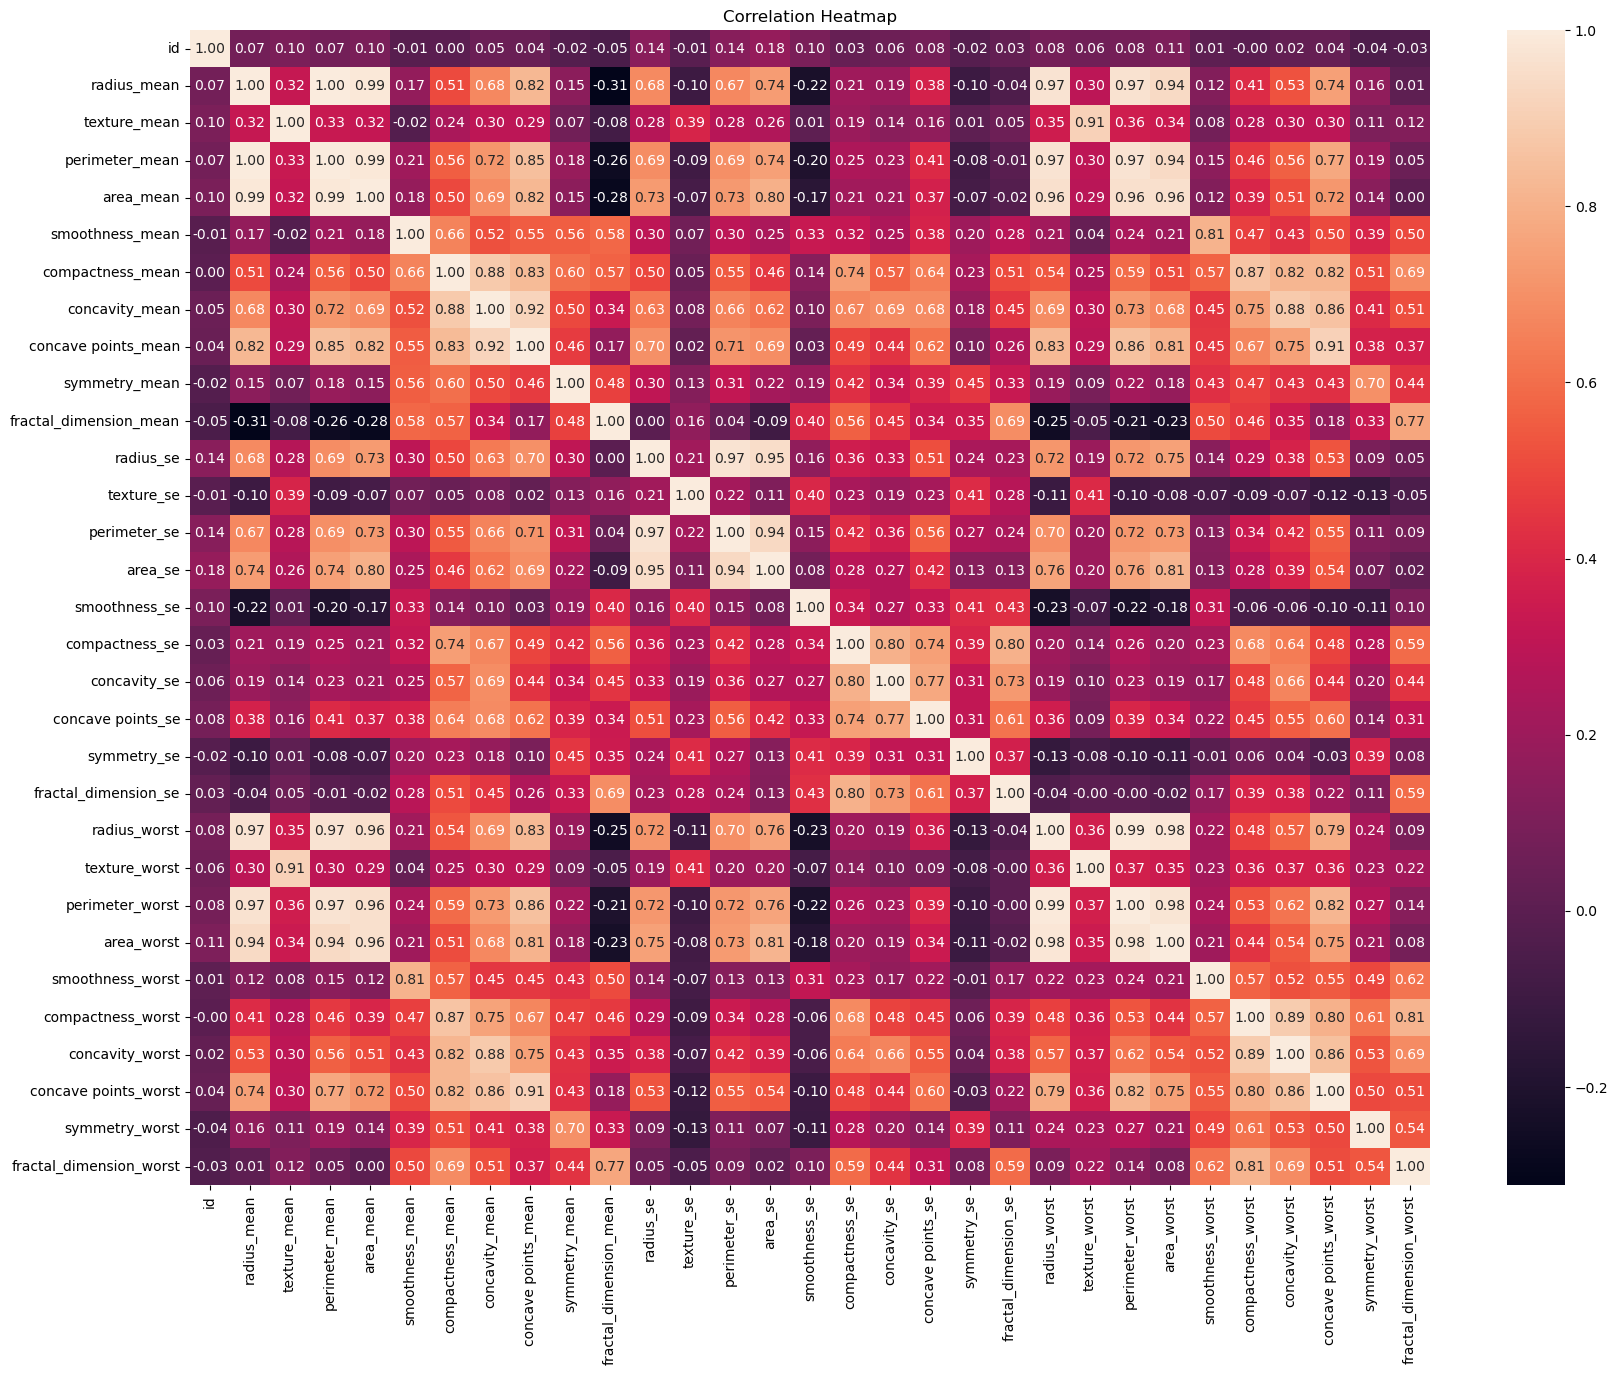

In [17]:
# Correlation heatmap of features
plt.figure(figsize=(20,15))
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Mean Features by Diagnosis Distribution Plots: Mean feature distributions are also plotted, which shows the distribution of values for Benign (B) and Malignant (M). Some of the features are radius_mean, texture mini mean, area mean (Radius), perimeter merge and smoothness newest. The other types include compactess minim blank 2 or 'and concavity'switch space number new state'.

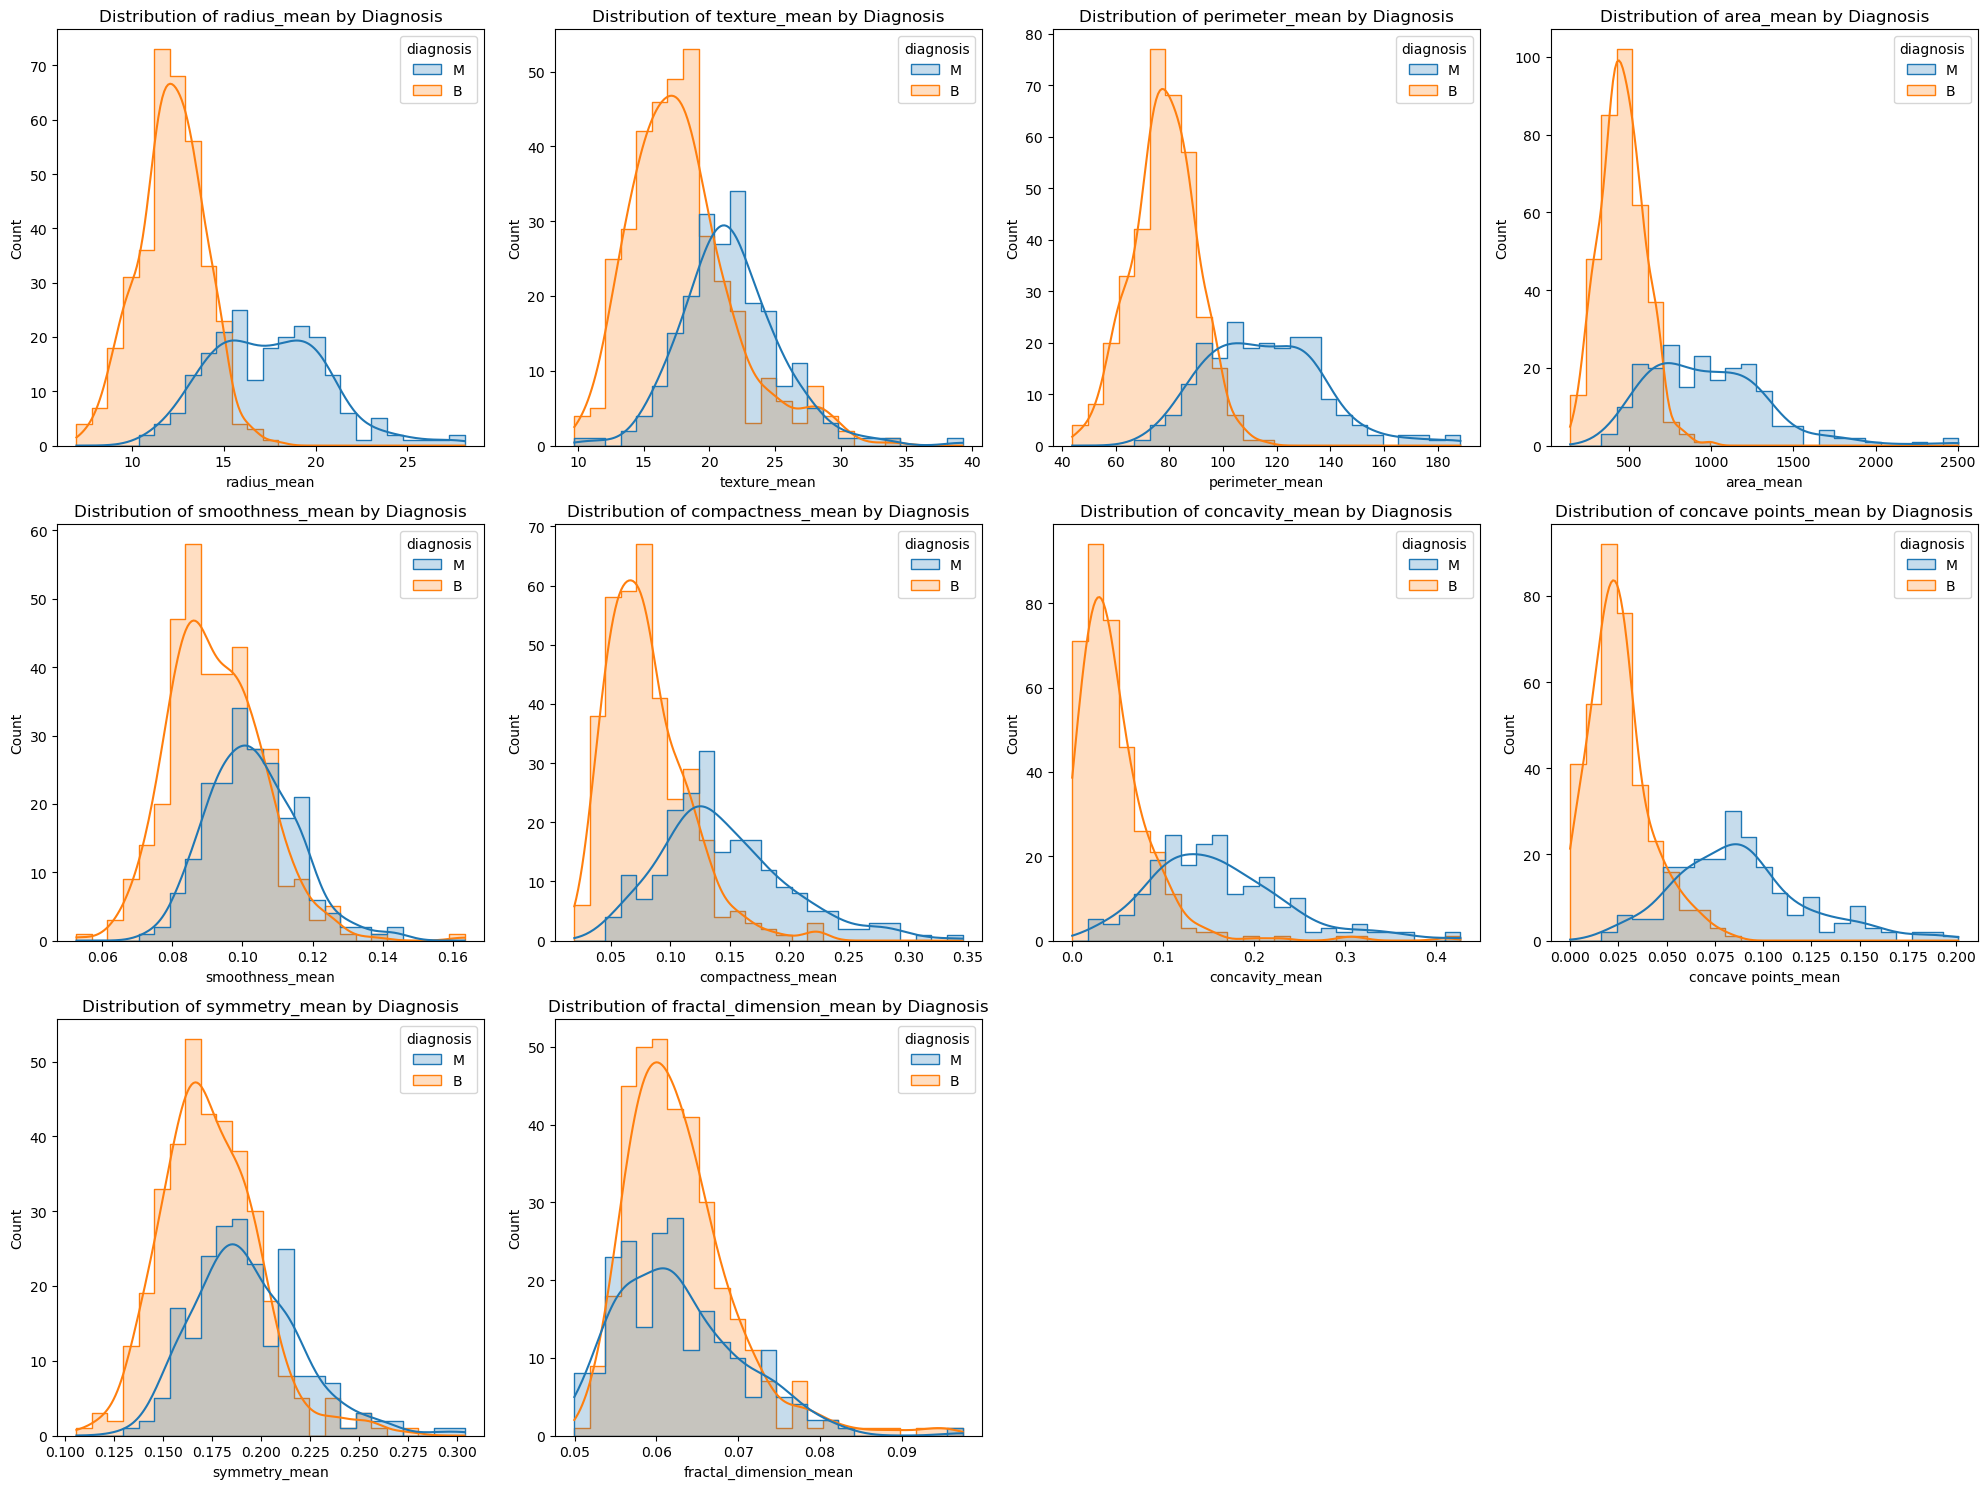

In [18]:
# Distribution Plots for Mean Features by Diagnosis
mean_columns = data.columns[2:12]  # Selecting columns related to mean features
plt.figure(figsize=(20,15))

for i, column in enumerate(mean_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data=data, x=column, hue='diagnosis', kde=True, element="step", bins=25)
    plt.title(f'Distribution of {column} by Diagnosis')

plt.tight_layout()
plt.show()


Worst Features--Pairplot: This pair plot is made of the 'worst' features--both objects that have to answer for their handwriting, like radius_ worst and texture_ worst, as well as the diagnosis class itself. This pairplot shows the relationships and distributions of these features all in one view.


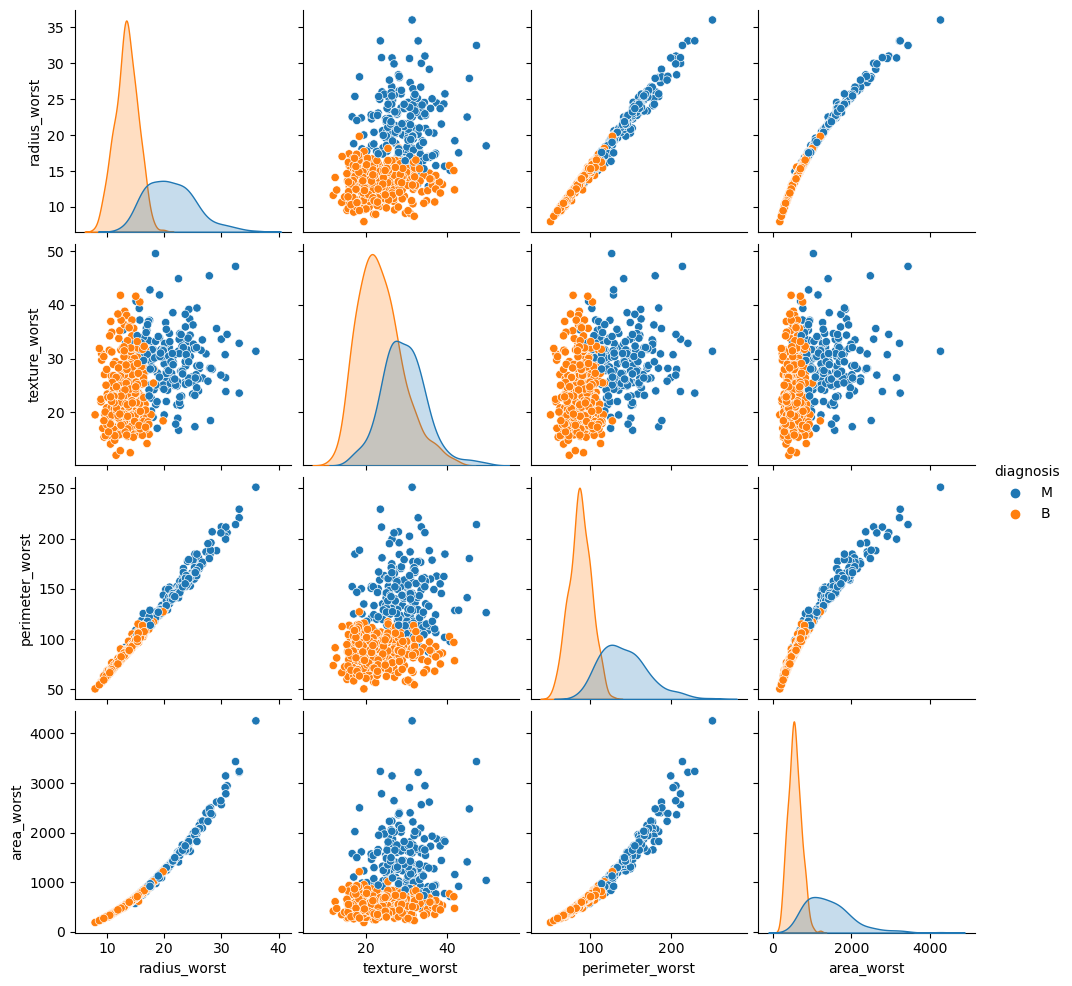

In [19]:
worst_features = data[['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'diagnosis']]

# Creating a pairplot for "worst" features
sns.pairplot(worst_features, hue='diagnosis', diag_kind='kde')
plt.show()

### Summary

The code used for EDA (exploratory data analysis) has performed a thorough review of the Breast Cancer Wisconsin Diagnostic Dataset. The analysis starts with structural information about the dataset, including things such as how many columns are in it and what kinds of data they contain. A bar plot depicts the distribution of the target variable-how many times each diagnosis (Malignant or Benign) is seen? They calculate the mean appearance of various characteristics according to diagnosis, in order to gain a deeper understanding about possible patterns of similarity or discrepancy between malignant and benign tumors.

The code continues by examining the remaining main data to assess whether there are any missing values or duplicates, and gives a summary of statistical measures. For example, exploratory data visualizations serve functions such as pair plots for selected features, correlation heatmaps of variables 'relationships with each other, and distribution plots among mean diagnoses. Such visualizations can help extract trends, patterns and correlations from the data.

Also, the code uses a pair plot to examine the worst characteristics and reveals their relationships with one another as well as how they relate to diagnosis. Towards breast cancer prediction Overall, the EDA process gives a clear general picture of a data distribution and makes it easier to understand bone patterns in its later. The next step is machine learning models for predicting such model behavior.

## Splitting the dataset

Data Preparation:
- The 'id' and 'diagnosis' columns were left out for the Features X.
- Secondly, the target variable y was defined. The malignant tumor is designated M; the benign one B.

In [20]:
X=data.drop(['id','diagnosis'],axis=1)
y=data['diagnosis'].map(lambda x: 1 if x == 'M' else 0)            

In [21]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [22]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

### Train Test Split

The data was then separated into training and testing sets with the scikit-learn function train test split.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [25]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.010840,0.012900,0.2743,0.06960,...,11.020,17.45,69.86,368.6,0.1275,0.09866,0.021680,0.02579,0.3557,0.08020
494,13.160,20.54,84.06,538.7,0.07335,0.05275,0.018000,0.012560,0.1713,0.05888,...,14.500,28.46,95.29,648.3,0.1118,0.16460,0.076980,0.04195,0.2687,0.07429
312,12.760,13.37,82.29,504.1,0.08794,0.07948,0.040520,0.025480,0.1601,0.06140,...,14.190,16.40,92.04,618.8,0.1194,0.22080,0.176900,0.08411,0.2564,0.08253
221,13.560,13.90,88.59,561.3,0.10510,0.11920,0.078600,0.044510,0.1962,0.06303,...,14.980,17.13,101.10,686.6,0.1376,0.26980,0.257700,0.09090,0.3065,0.08177
56,19.210,18.57,125.50,1152.0,0.10530,0.12670,0.132300,0.089940,0.1917,0.05961,...,26.140,28.14,170.10,2145.0,0.1624,0.35110,0.387900,0.20910,0.3537,0.08294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,13.050,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,...,14.230,22.25,90.24,624.1,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289
481,13.900,19.24,88.73,602.9,0.07991,0.05326,0.029950,0.020700,0.1579,0.05594,...,16.410,26.42,104.40,830.5,0.1064,0.14150,0.167300,0.08150,0.2356,0.07603
317,18.220,18.87,118.70,1027.0,0.09746,0.11170,0.113000,0.079500,0.1807,0.05664,...,21.840,25.00,140.90,1485.0,0.1434,0.27630,0.385300,0.17760,0.2812,0.08198
295,13.770,13.27,88.06,582.7,0.09198,0.06221,0.010630,0.019170,0.1592,0.05912,...,14.670,16.93,94.17,661.1,0.1170,0.10720,0.037320,0.05802,0.2823,0.06794


In [26]:
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
349,11.950,14.96,77.23,426.7,0.11580,0.12060,0.01171,0.017870,0.2459,0.06581,...,12.810,17.72,83.09,496.2,0.1293,0.1885,0.03122,0.04766,0.3124,0.07590
236,23.210,26.97,153.50,1670.0,0.09509,0.16820,0.19500,0.123700,0.1909,0.06309,...,31.010,34.51,206.00,2944.0,0.1481,0.4126,0.58200,0.25930,0.3103,0.08677
416,9.405,21.70,59.60,271.2,0.10440,0.06159,0.02047,0.012570,0.2025,0.06601,...,10.850,31.24,68.73,359.4,0.1526,0.1193,0.06141,0.03770,0.2872,0.08304
62,14.250,22.15,96.42,645.7,0.10490,0.20080,0.21350,0.086530,0.1949,0.07292,...,17.670,29.51,119.10,959.5,0.1640,0.6247,0.69220,0.17850,0.2844,0.11320
441,17.270,25.42,112.40,928.8,0.08331,0.11090,0.12040,0.057360,0.1467,0.05407,...,20.380,35.46,132.80,1284.0,0.1436,0.4122,0.50360,0.17390,0.2500,0.07944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,13.690,16.07,87.84,579.1,0.08302,0.06374,0.02556,0.020310,0.1872,0.05669,...,14.840,20.21,99.16,670.6,0.1105,0.2096,0.13460,0.06987,0.3323,0.07701
85,18.460,18.52,121.10,1075.0,0.09874,0.10530,0.13350,0.087950,0.2132,0.06022,...,22.930,27.68,152.20,1603.0,0.1398,0.2089,0.31570,0.16420,0.3695,0.08579
59,8.618,11.79,54.34,224.5,0.09752,0.05272,0.02061,0.007799,0.1683,0.07187,...,9.507,15.40,59.90,274.9,0.1733,0.1239,0.11680,0.04419,0.3220,0.09026
213,17.420,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.065970,0.1308,0.05866,...,18.070,28.07,120.40,1021.0,0.1243,0.1793,0.28030,0.10990,0.1603,0.06818


In [27]:
y_train

60     0
494    0
312    0
221    0
56     1
      ..
58     0
481    0
317    1
295    0
175    0
Name: diagnosis, Length: 455, dtype: int64

### Scaling the data

Scaled the features with scikit-learn's 'StandardScaler'. For most machine learning algorithms it is important to standardize the features on a common scale.

In [28]:
scaler = StandardScaler()

In [29]:
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [30]:
X_train

array([[-1.13285393, -1.0028728 , -1.13673887, ..., -1.37151339,
         1.0194962 , -0.21552396],
       [-0.28590136,  0.3151263 , -0.33707109, ..., -1.123954  ,
        -0.34175091, -0.54112929],
       [-0.39920605, -1.35449446, -0.40961911, ..., -0.47809359,
        -0.53420309, -0.08715502],
       ...,
       [ 1.147403  , -0.07375329,  1.08273885, ...,  0.95410491,
        -0.14616943, -0.1174567 ],
       [-0.1131117 , -1.37778067, -0.17312075, ..., -0.87777334,
        -0.12895826, -0.89097597],
       [-1.55746326, -1.10300347, -1.55194311, ..., -1.76659735,
        -0.49039284, -0.31028558]])

**Resulting Shapes:**
- The shapes of X _ train and x test are (455, 30) and (114, 30), respectively.
- The shapes of y ︰train and y test are (455,) and (114,), respectively.

In [31]:
X_train.shape

(455, 30)

In [32]:
y_train.shape

(455,)

In [33]:
y_test.shape

(114,)

In [34]:
X_test.shape

(114, 30)

### Summary

In the provided code, the process of preparing the Breast Cancer Wisconsin (Diagnostic) Dataset for machine learning involves three crucial steps: splitting data, train-test split and scaling.

Firstly, the dataset is split into two components: X features and the target variable y. Its attributes are derived from measurements of women's breasts, including radius, texture and perimeter among others; the target variable is diagnosis (malignant (M) or benign B).

Afterwards, the data is split into training and test sets using scikit-learn's train_test_split function. It is an important step in evaluating the model's performance on new data. Of codes, 80 percent is for training the machine learning models; and only twenty are left to test on. With this split, the models are trained on a sizable chunk of data and then tested against another set to measure generalization performance.

Last, the feature data (X) is scaled using StandardScaler from scikit-learn. Scaling is used to maintain equality of importance among the different features, so that any one feature with a larger scale does not predominate during model training. The StandardScaler method normalizes the features to zero mean and unit variance. The machine learning models are trained and tested using this standardized data.

To sum up, data splittin g, train-test splitting and scaling are three indispensable links in developing a reliable unbiased model for predicting breast cancer. This guarantees that the model is being trained on a wide range of data, tested against new samples and ensures that all available features were used during training.

# Model


Dataframe Creation (compare):To compare the performance of various machine learning methods, a new DataFrame is created to hold them. Each model's name, training accuracy rate and testing accuracy are shown. F1 score, recall ratio and precision ratio are also included in columns for reference purposes.


In [35]:
compare=pd.DataFrame({'Model':[], "Training Accuracy":[], "Testing Accuracy":[], "F1 Score":[], "Recall":[], 
                     "Precision":[]})
compare

,Model,Training Accuracy,Testing Accuracy,F1 Score,Recall,Precision


### Logistic Regression 

The logistic regression model is a linear classifier based on binary classification. Given a set of features on such tumors, it estimates the probability that any particular breast tumor is malignant or benign. Logistic Regression determine the prob-ability that an instance belongs to a particular class, and then use this as decision threshold. This model is interpretable and can handle a linear relationship between features and the target variable.

Initialization: The Logistic Regression model is constructed using the scikit-learn library's logastic regression class.

In [136]:
LR=LogisticRegression()

Training: The model is then trained by fitting it on the training data (X_train and y _ train).

In [137]:
LR.fit(X_train,y_train)

LogisticRegression()

Prediction: This trained model is then applied to the test set (X_test) in order to determine its target values.

In [138]:
y_pred=LR.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0], dtype=int64)

Evaluation: precision, recall, F1 score and other evaluation metrics are then printed in a classification report. It uses these metrics to determine how well the model performed on its test set.

In [139]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        70
           1       1.00      0.98      0.99        44

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



Performance Metrics: The model's performance is checked with training accuracy, testing accuracy, recall and precision, as well a score F1.

In [40]:
train_acc=LR.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9868131868131869
Testing Accuracy : 0.9912280701754386
F1 Score : 0.9885057471264368
Recall : 0.9772727272727273
Precision : 1.0


Comparison Table: The output of Logistic Regression is also entered in the comparison table (run compare), making it easier to make a comparative analysis.

In [140]:
compare.loc[0]=['Logistic Regression', train_acc, test_acc, f1, recal, prec]

Confusion Matrix: The confusion matrix is plotted as a heatmap that visually displays the model's classification performance.

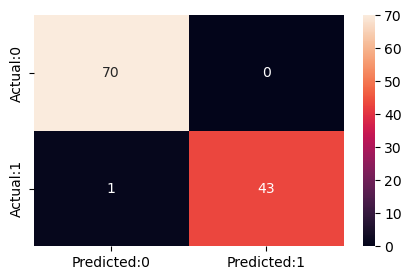

In [42]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

### Support Vector Machine

SVM (support vector machine) is a superclassification algorithm that attempts to locate a hyperplane in high-dimensional space which best separates classes. SVM supports both linear and non-linear relationships. Whether a tumor is benign or malignant can be determined by using the features of the dataset and SVM prediction. When the decision boundary is especially difficult, it's even more effective.

Creating an SVM instance:For one, an SVM classifier is constructed using the radial basis function ('rbf') kernel.

In [43]:
svm=SVC()

Training the SVM model:The training data (X, y) is used to train the model.

In [44]:
svm.fit(X_train,y_train)

SVC()

Predicting labels:The trained SVM model is then used to predict the labels of a test set (the variable 'X_test') and these predictions are saved in y.

In [45]:
y_pred=svm.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0], dtype=int64)

Displaying classification report : scikit-learn's 'classification_report()'. The classification report gives the precision, recall and F1 score with more detailed information.

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        70
           1       0.98      0.95      0.97        44

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Calculating performance metrics:Performance generally includes a variety of quantities calculated from metrics like training accuracy, testing accuracy, recall and precision.

In [47]:
train_acc=svm.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9846153846153847
Testing Accuracy : 0.9736842105263158
F1 Score : 0.9655172413793104
Recall : 0.9545454545454546
Precision : 0.9767441860465116


Adding to the comparison table: The calculated performance metrics are appended to the compare table, for later comparison with other models.

In [48]:
compare.loc[1]=['Support Vector Machine', train_acc, test_acc, f1, recal, prec]

Generating and displaying the confusion matrix: They simply use the 'confusion_matrix' function to create a confusion matrix for their predictions and then turn that into a heat map.

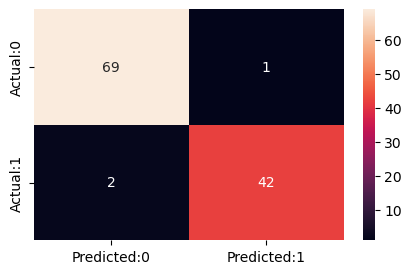

In [49]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

### K-Nearest Neighbors (KNN):

K-Nearest Neighbors is an instance based, non parametric learning model. It places instances in classes according to the majority class of their k-nearest neighbors. In breast cancer prediction, KNN takes into account the characteristics of neighboring instances. A straightforward and easily understood method, it is influenced by the selection of distance metric and number of neighbors.

Using a K-Nearest Neighbors(KNN) classifier here, which uses the nine nearby neighbors for classification 

In [50]:
knn=KNeighborsClassifier(n_neighbors=9)

The KNN model is trained with the training data.

In [51]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

Based on the test data (X_test), predictions are made, and results put away in y_pred.

In [52]:
y_pred=knn.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0], dtype=int64)

Precision, recall, F1-score and support for every class are printed out in the classification report.

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        70
           1       0.98      0.91      0.94        44

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [54]:
train_acc=knn.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9758241758241758
Testing Accuracy : 0.956140350877193
F1 Score : 0.9411764705882352
Recall : 0.9090909090909091
Precision : 0.975609756097561


The comparison table is supplemented with model performance measures to faciliate later analysis. Also, a confusion matrix is constructed and represented as a heatmap

In [55]:
compare.loc[2]=['KNN', train_acc, test_acc, f1, recal, prec]

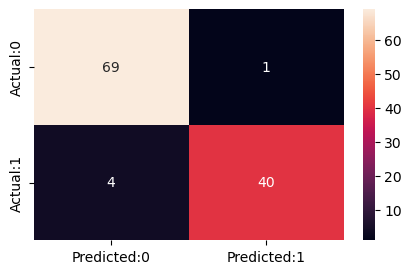

In [56]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

Let us apply the same steps to the remaining models.

### Gaussian Naive Bayes:

Naive Bayes is a probabilistic classification method that uses Bayes 'theorem. This is based on the conditional independence of features due to their class label. We use the Gaussian Naive Bayes variant when working with continuous data-because that's what breast cancer is. Computationally efficient, and can analyze high-dimensional data.

In [57]:
NB = GaussianNB()

In [58]:
NB.fit(X_train,y_train)

GaussianNB()

In [59]:
y_pred=NB.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0], dtype=int64)

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94        70
           1       0.91      0.89      0.90        44

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



In [61]:
train_acc=NB.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9318681318681319
Testing Accuracy : 0.9210526315789473
F1 Score : 0.896551724137931
Recall : 0.8863636363636364
Precision : 0.9069767441860465


In [62]:
compare.loc[3]=['Gaussian Naives Bayes', train_acc, test_acc, f1, recal, prec]

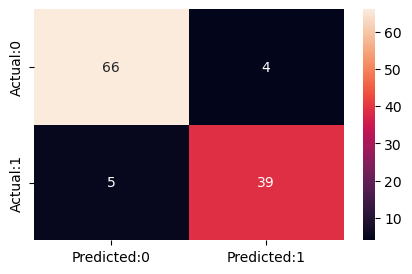

In [63]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

### Decision Tree

The Decision Tree is a non-linear model where it recursively breaks down the data at each element based on the most representative feature. As in the example of breast cancer prediction, Decision Trees can learn hierarchical decision rules for classifying tumors. They are interpretable, easy to understand and able to pick up non-linear relationships.

In [64]:
DT=DecisionTreeClassifier(random_state=8)

In [65]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(random_state=8)

In [66]:
y_pred=DT.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0], dtype=int64)

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        70
           1       0.91      0.95      0.93        44

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



In [68]:
train_acc=DT.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 1.0
Testing Accuracy : 0.9473684210526315
F1 Score : 0.9333333333333332
Recall : 0.9545454545454546
Precision : 0.9130434782608695


In [69]:
compare.loc[4]=['Decision Tree', train_acc, test_acc, f1, recal, prec]

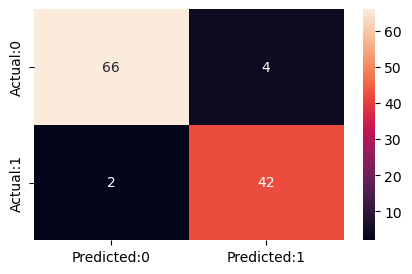

In [70]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

### Random forest

Random Forest is an ensemble learning approach that uses multiple decision trees and aggregates the results. The tree is trained on a random selection of data and features, which helps to minimize overswing. So then you use Random Forest to get better accuracy and robustness than just a single Decision Tree.

In [71]:
RF=RandomForestClassifier(n_estimators=50,random_state=1)

In [72]:
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=1)

In [73]:
y_pred=RF.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0], dtype=int64)

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        70
           1       0.95      0.93      0.94        44

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [75]:
train_acc=RF.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 1.0
Testing Accuracy : 0.956140350877193
F1 Score : 0.942528735632184
Recall : 0.9318181818181818
Precision : 0.9534883720930233


In [76]:
compare.loc[5]=['Random forest', train_acc, test_acc, f1, recal, prec]

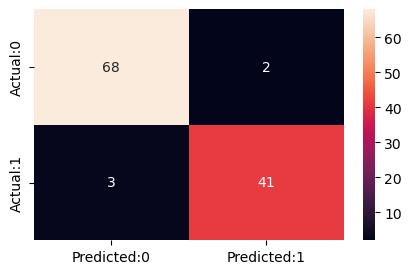

In [77]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

### Gradient Boosting

Another ensemble method is Gradient Boosting, which constructs a set of weak learners (often decision trees) one after another. It seems that every new tree makes up for the faults of its predecessors. Gradient Boosting is good at handling hidden relationships in the data and still keeping prediction errors low.

In [78]:
GB=GradientBoostingClassifier(n_estimators=12)

In [79]:
GB.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=12)

In [80]:
y_pred=GB.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0], dtype=int64)

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        70
           1       0.95      0.89      0.92        44

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [82]:
train_acc=GB.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9868131868131869
Testing Accuracy : 0.9385964912280702
F1 Score : 0.9176470588235294
Recall : 0.8863636363636364
Precision : 0.9512195121951219


In [83]:
compare.loc[6]=['Gradient Boosting', train_acc, test_acc, f1, recal, prec]

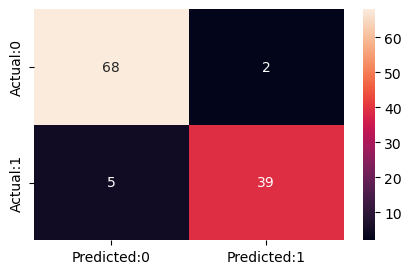

In [84]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

### Stochastic Gradient Descent

SGD is an optimizer--an algorithm used to train machine learning models. In the context of breast cancer prediction, SGD is used to find suitable model parameters that minimize a loss function. This is very effective for large sized data and involves a lot of calculation.

In [85]:
SGD=SGDClassifier(loss='modified_huber', random_state=10)

In [86]:
SGD.fit(X_train,y_train)

SGDClassifier(loss='modified_huber', random_state=10)

In [87]:
y_pred=SGD.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0], dtype=int64)

In [88]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        70
           1       0.93      0.93      0.93        44

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [89]:
train_acc=SGD.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.978021978021978
Testing Accuracy : 0.9473684210526315
F1 Score : 0.9318181818181818
Recall : 0.9318181818181818
Precision : 0.9318181818181818


In [90]:
compare.loc[7]=['Stochastic Gradient Descent', train_acc, test_acc, f1, recal, prec]

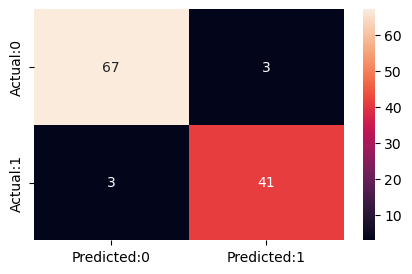

In [91]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

### XGBoost	

Extreme Gradient Boosting (XGBoost) is an improved version of gradient boosting. That includes regularization terms and is designed for speed, efficiency. XGBoost is used to boost the model's predictive abilities, thus increasing overall accuracy.

In [92]:
XGB= XGBClassifier(random_state=0,n_estimators=88,booster='gbtree') 

In [93]:
XGB.fit(X_train,y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=88, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [94]:
y_pred=XGB.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0])

In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        70
           1       0.96      0.98      0.97        44

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [96]:
train_acc=XGB.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 1.0
Testing Accuracy : 0.9736842105263158
F1 Score : 0.9662921348314608
Recall : 0.9772727272727273
Precision : 0.9555555555555556


In [97]:
compare.loc[8]=['XGBoost', train_acc, test_acc, f1, recal, prec]

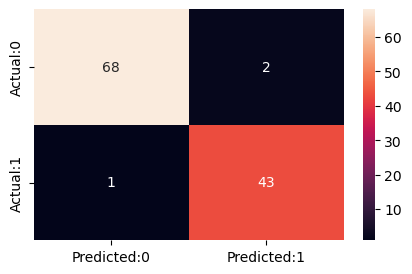

In [98]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

### LightGBM

LightGBM is a framework for gradient boosted trees that performs distributed and efficient training. It has the same tree-based framework as XGBoost, but emphasizes speed and memory efficiency. High-performance breast cancer prediction is applied to LightGBM.

In [99]:
LGBM=LGBMClassifier(random_state=0,n_estimators=22)

In [100]:
LGBM.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 168, number of negative: 287
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4546
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369231 -> initscore=-0.535518
[LightGBM] [Info] Start training from score -0.535518
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

LGBMClassifier(n_estimators=22, random_state=0)

In [101]:
y_pred=LGBM.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0], dtype=int64)

In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        70
           1       0.93      0.89      0.91        44

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



In [103]:
train_acc=LGBM.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9868131868131869
Testing Accuracy : 0.9298245614035088
F1 Score : 0.9069767441860465
Recall : 0.8863636363636364
Precision : 0.9285714285714286


In [104]:
compare.loc[9]=['LGBM', train_acc, test_acc, f1, recal, prec]

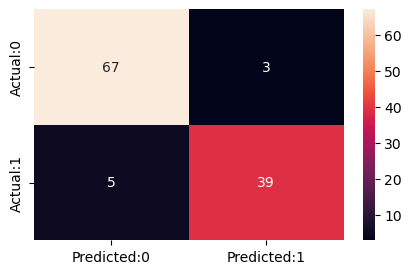

In [105]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

### Neural Network

This Keras implementation of a feedforward neural network is known as the BNN(Basic Neural Network). It is constructed from many layers of interlinked nodes and can learn non-linearity in the data. Neural Networks are strong models. They can represent subtle structures, but may need some fine-tuning and be computationally complex.

In [106]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(2,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [107]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 100)               3100      
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                                 
Total params: 3302 (12.90 KB)
Trainable params: 3302 (12.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [108]:
history=model.fit(X_train,y_train,epochs=20,validation_split=0.1,shuffle=True)

Epoch 1/20


13/13 [==============================] - 2s 37ms/step - loss: 0.5696 - accuracy: 0.6675 - val_loss: 0.3188 - val_accuracy: 0.9348
Epoch 2/20
13/13 [==============================] - 0s 8ms/step - loss: 0.2498 - accuracy: 0.9267 - val_loss: 0.1989 - val_accuracy: 0.9348
Epoch 3/20
13/13 [==============================] - 0s 8ms/step - loss: 0.1643 - accuracy: 0.9462 - val_loss: 0.1627 - val_accuracy: 0.9565
Epoch 4/20
13/13 [==============================] - 0s 7ms/step - loss: 0.1345 - accuracy: 0.9560 - val_loss: 0.1407 - val_accuracy: 0.9783
Epoch 5/20
13/13 [==============================] - 0s 7ms/step - loss: 0.1166 - accuracy: 0.9682 - val_loss: 0.1253 - val_accuracy: 0.9783
Epoch 6/20
13/13 [==============================] - 0s 6ms/step - loss: 0.1045 - accuracy: 0.9731 - val_loss: 0.1147 - val_accuracy: 0.9783
Epoch 7/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0961 - accuracy: 0.9731 - val_loss: 0.1056 - val_accuracy: 0.9783
Epoch 8/20
13/13 

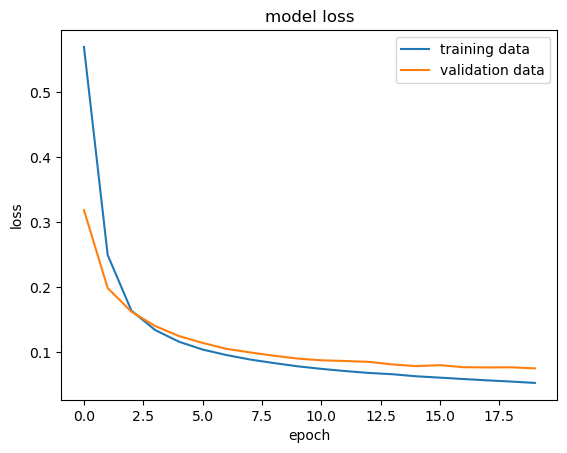

In [109]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

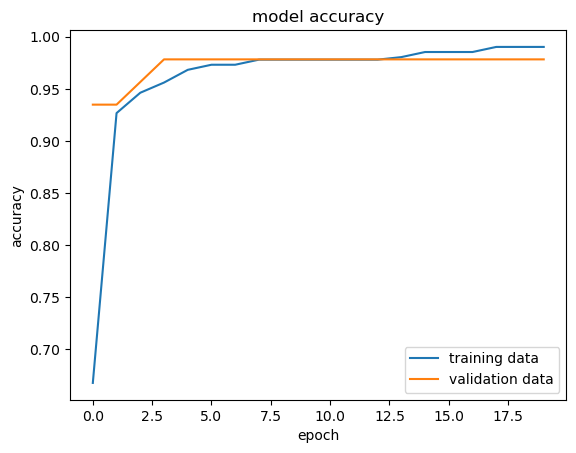

In [110]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

In [111]:
loss, accuracy = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.0713 - accuracy: 0.9825


In [112]:
X_test[0]

array([-0.62864805, -0.98424383, -0.61701629, -0.65582516,  1.36195553,
        0.28924447, -0.98371026, -0.80280718,  2.36754536,  0.43216864,
       -0.15525144, -0.24920512, -0.20096204, -0.29236003, -0.40326192,
       -0.07142123, -0.9113343 , -0.20216627,  0.80212544, -0.26813638,
       -0.7297634 , -1.28309887, -0.73297203, -0.68712255, -0.13553972,
       -0.42890218, -1.16355934, -1.03648097,  0.34200194, -0.45242801])

In [113]:
y_pred = model.predict(X_test)
y_pred

4/4 [==============================] - 0s 0s/step


array([[9.79151130e-01, 1.43253645e-02],
       [4.07960324e-05, 9.99995887e-01],
       [9.41740274e-01, 2.69373152e-02],
       [8.83965120e-02, 9.57333386e-01],
       [5.55402450e-02, 9.85255480e-01],
       [8.71593118e-01, 1.36400163e-01],
       [7.41574466e-01, 1.28468350e-01],
       [9.90809739e-01, 2.32932228e-03],
       [2.42478430e-01, 8.22721362e-01],
       [7.36956239e-01, 2.16847986e-01],
       [5.15352112e-05, 9.99998033e-01],
       [9.28653553e-02, 9.70036745e-01],
       [9.50222015e-01, 3.93169113e-02],
       [9.64341700e-01, 1.40699558e-02],
       [9.92567301e-01, 1.60604087e-03],
       [1.02779064e-02, 9.95634913e-01],
       [9.35374856e-01, 2.58178655e-02],
       [5.91678977e-01, 3.78217250e-01],
       [3.33094120e-01, 7.59882569e-01],
       [5.06165802e-01, 7.19132066e-01],
       [1.28993690e-01, 7.86358595e-01],
       [9.65844989e-01, 1.75292790e-02],
       [2.70555411e-02, 9.86382127e-01],
       [9.74500418e-01, 7.38010602e-03],
       [5.136665

In [114]:
y_pred[0]

array([0.9791511 , 0.01432536], dtype=float32)

In [115]:
np.argmax(y_pred[0])

0

In [116]:
y_test[:1]

349    0
Name: diagnosis, dtype: int64

In [117]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels

[0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0]

In [118]:
print(classification_report(y_test,y_pred_labels))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        70
           1       0.98      0.98      0.98        44

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [119]:
accuracy

0.9824561476707458

In [120]:
metric = tf.keras.metrics.Recall()
metric.update_state(y_test, y_pred_labels)
print("Recall =",metric.result().numpy())

Recall = 0.97727275


In [121]:
m = tf.keras.metrics.Precision()
m.update_state(y_test, y_pred_labels)
print("Precision =",m.result().numpy())

Precision = 0.97727275


In [122]:
y_pred_train_labels=[np.argmax(i) for i in model.predict(X_train)] 
y_pred_train_labels

15/15 [==============================] - 0s 2ms/step


[0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,


In [123]:
train_acc=accuracy_score(y_train,y_pred_train_labels)
test_acc=accuracy_score(y_test,y_pred_labels)
recal=recall_score(y_test,y_pred_labels)
prec=precision_score(y_test,y_pred_labels)
f1=f1_score(y_test,y_pred_labels)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.989010989010989
Testing Accuracy : 0.9824561403508771
F1 Score : 0.9772727272727273
Recall : 0.9772727272727273
Precision : 0.9772727272727273


In [124]:
compare.loc[10]=['Neural Network', train_acc, test_acc, f1, recal, prec]

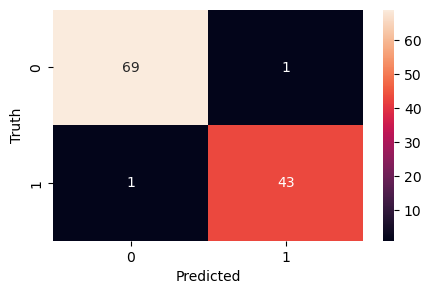

In [125]:
cm = tf.math.confusion_matrix(y_test,y_pred_labels)
plt.figure(figsize = (5,3))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Summary

The code employs several different types of machine learning to predict breast cancer based on the Breast Cancer Wisconsin (Diagnostic)DataSet. Models also included old standbys such as Logistic Regression, Support Vector Machine (SVM), K- Nearest Neighbour (KNN) regressor, Naive Bayes Gaussian Classifier and Decision Tree; newer trees like Random Forest, Gradient Boosting and Stochastic Gradient Descent were there too. Other additions included XGBoost We then Train and test each model on the dataset, comparing their performance by means of measures such as training accuracy, testing accuracy or F1 score (a combination average of precision and recall). Data preprocessing includes reading the data, understanding how to use it. Dealing with missing values and duplicates Previewing relationships among features visually After preprocessing the data, it is divided into training and testing sets to train the models. Furthermore, standard scaling is used to ensure that feature values are all the same scale. We train the neural network with TensorFlow's Keras API, specifying its architecture and training parameters. All results are in tabular format, with the performance metrics of each model compared. The confusion matrix and visual tools like pair plots, correlation heatmaps, distribution plots etc. can tell you about characteristics of the data set itself as well as what models are capable of doing with it given a particular training methodology. The analysis seeks to determine which model predicts better for breast cancer based on this data.

## Model Selection

Model Performance Metrics:The code relies on the existence of a dataframe (compared) with model performance indicators. The metrics are accuracy for training and testing, F1 score, recall rate and precision of each model.

In [126]:
compare

,Model,Training Accuracy,Testing Accuracy,F1 Score,Recall,Precision
0,Logistic Regression,0.986813,0.991228,0.988506,0.977273,1.000000
1,Support Vector Machine,0.984615,0.973684,0.965517,0.954545,0.976744
2,KNN,0.975824,0.956140,0.941176,0.909091,0.975610
3,Gaussian Naives Bayes,0.931868,0.921053,0.896552,0.886364,0.906977
4,Decision Tree,1.000000,0.947368,0.933333,0.954545,0.913043
5,Random forest,1.000000,0.956140,0.942529,0.931818,0.953488
6,Gradient Boosting,0.986813,0.938596,0.917647,0.886364,0.951220
7,Stochastic Gradient Descent,0.978022,0.947368,0.931818,0.931818,0.931818
8,XGBoost,1.000000,0.973684,0.966292,0.977273,0.955556
9,LGBM,0.986813,0.929825,0.906977,0.886364,0.928571


Bar Plots for Model Comparison:
Seaborn's bar plot is then used to sub-plot various model performances for purposes of comparison.
Bars are drawn across each sub plot against a common y axis of model names, and an x-axis representing some metric (training accuracy for example).
It bobheadsbar This will console you as it searches for the next metric (the query at line 2, jumping to ax.Query).

Metrics Included:
The bar plots show training accuracy, testing accuracy, F1 score and precision recall values.
Each sub plot illustrates concisely the performance of each model on various evaluation criteria.

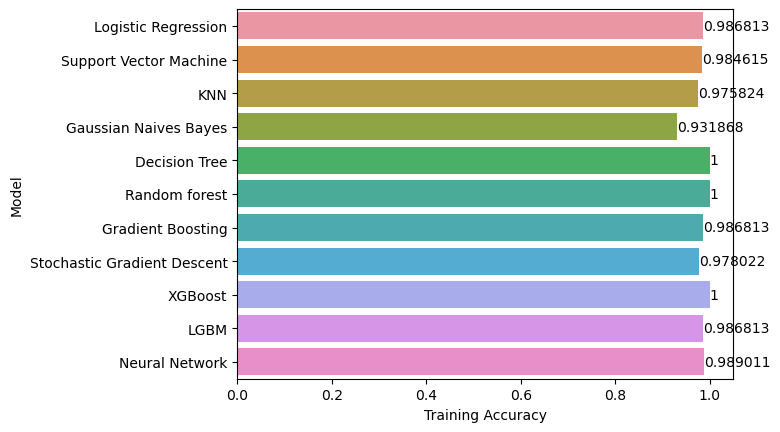

In [127]:
ax=sns.barplot(data=compare,y='Model',x='Training Accuracy')
for i in ax.containers:
    ax.bar_label(i)

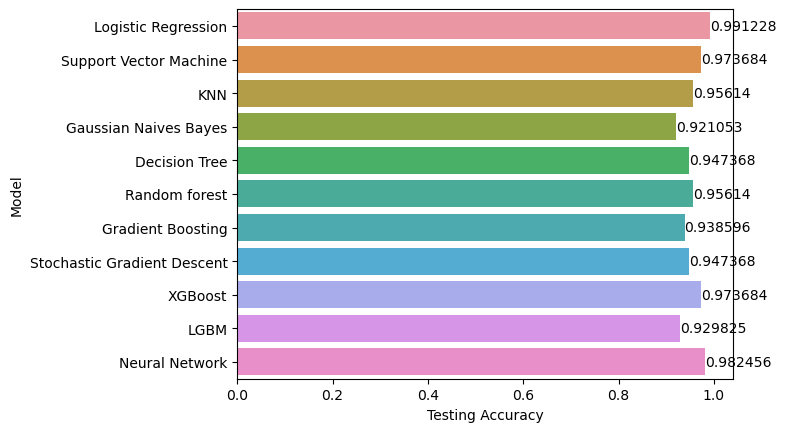

In [128]:
ax=sns.barplot(data=compare,y='Model',x='Testing Accuracy')
for i in ax.containers:
    ax.bar_label(i)

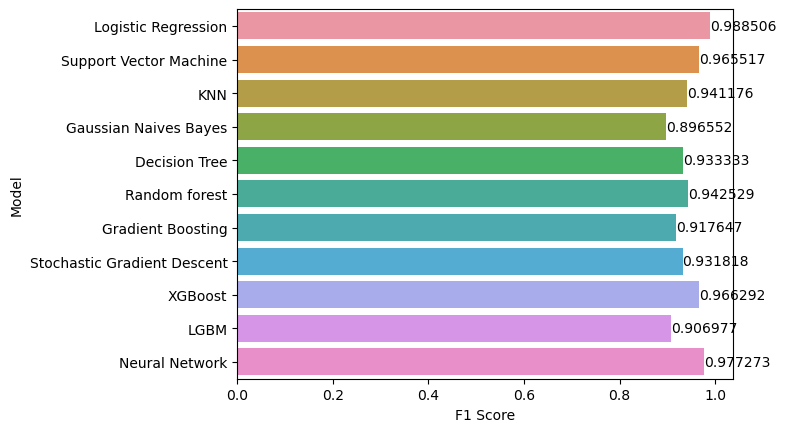

In [129]:
ax=sns.barplot(data=compare,y='Model',x='F1 Score')
for i in ax.containers:
    ax.bar_label(i)

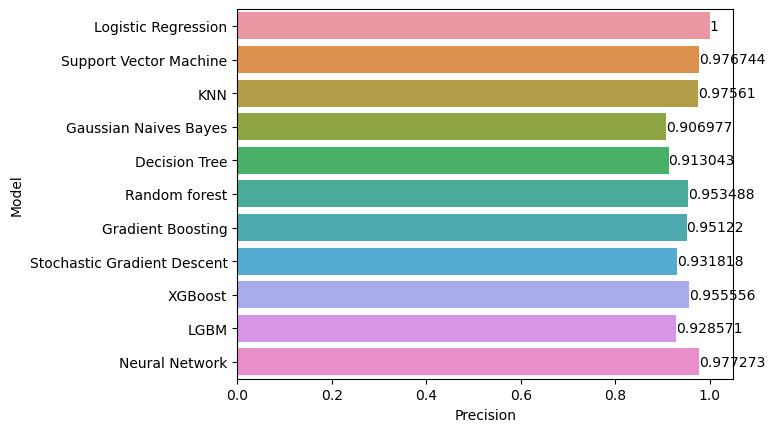

In [130]:
ax=sns.barplot(data=compare,y='Model',x='Precision')
for i in ax.containers:
    ax.bar_label(i)

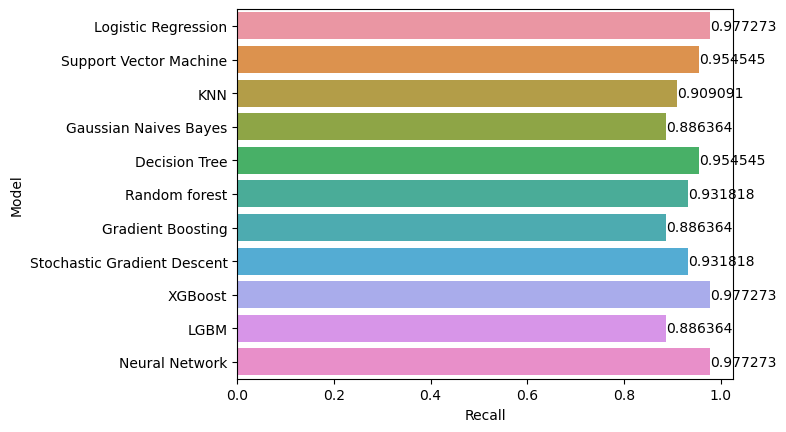

In [131]:
ax=sns.barplot(data=compare,y='Model',x='Recall')
for i in ax.containers:
    ax.bar_label(i)

### Summary

During the model selection process, numerous classifiers were applied to and tested on Breast Cancer Wisconsin (Diagnostic) Dataset in an attempt to predict breast cancer. This variety of classifiers ranged over Logistic Regression, Support Vector Machine (SVM), K-Nearest Neighbors (KNN), Gaussian Naive Bayes, Decision Tree, Random Forest and Gradient Boosting. It also included Stochastic Gradient Descent (SGD) Systems; XGBoost Standalone and LightGBM; as well Important evaluation criteria for each model included training accuracy, testing accuracy, F1 score (a combined metric of precision and recall), recall rate and precision. Comparison provided some subtle clues about the quality of each algorithm, in terms of how accurately they could distinguish between benign and malignant tumors. In particular, the Neural Network behaved competitively on all four count criteria and is therefore considered a good contender for breast cancer prediction. This process of thorough assessment and model selection can serve as a convenient reference for the development and implementation of dependable systems capable of efficiently screening people at risk for early breast cancer.

# Prediction

Prediction Function (predict_cancer):predict_cancer accepts patient data as input, scales it with the previously defined scaler and then uses a pretrained neural network model to make predictions.
Predicted label returns a string indicating whether the tumor is predicted to be Malignant or Benign.

In [132]:
# i will be using Neural Network for prediction
def predict_cancer(input):
    df=scaler.transform(np.array([input]))
    prediction = model.predict(df)
    prediction_label = np.argmax(prediction)
    return 'The tumor is Malignant (cancerous)' if prediction_label==1 else 'The tumor is Benign (non-cancerous)'

In [142]:
List_col=[col for col in X.columns]
List_col.insert(0,'id')
print(List_col)

['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


User Input for Patient Data: For various features of breast cancer, the code asks the user to input patient data.
Each feature's value is stored in the patient_data list based on direct user input.

Prediction Result: The function takes all of the data provided by its user (except 'id') as input to predict.
The result shows whether the tumor is predicted to be Malignant or Benign.

Note: The 'id' column is an identifier and takes a value of id as the input.
Other columns are treated as floating-point input, which means that this is a number feature.

In [134]:
print('----------------------------------------------------------------------------------------------------------------------')
print('\t\t\t\t *** BREAST CANCER PREDICTION SYSTEM ***')   
print('----------------------------------------------------------------------------------------------------------------------')
print('Please fill the following details =>\n')
patient_data=[]
for col in List_col:
    val=int(input('Enter the {}:'.format(col))) if col=='id' else float(input('Enter the {}:'.format(col)))
    patient_data.append(val)
print('\n\n')
print('----------------------------------------------------------------------------------------------------------------------')
result=predict_cancer(patient_data[1:])
print('PREDICTION :',end=' ')
print(result)
print('----------------------------------------------------------------------------------------------------------------------')

----------------------------------------------------------------------------------------------------------------------
				 *** BREAST CANCER PREDICTION SYSTEM ***
----------------------------------------------------------------------------------------------------------------------
Please fill the following details =>

Enter the id:864018
Enter the radius_mean:11.34
Enter the texture_mean:21.26
Enter the perimeter_mean:72.48
Enter the area_mean:396.5
Enter the smoothness_mean:0.08759
Enter the compactness_mean:0.06575
Enter the concavity_mean:0.05133
Enter the concave points_mean:0.01899
Enter the symmetry_mean:0.1487
Enter the fractal_dimension_mean:0.06529
Enter the radius_se:0.2344
Enter the texture_se:0.9861
Enter the perimeter_se:1.597
Enter the area_se:16.41
Enter the smoothness_se:0.009113
Enter the compactness_se:0.01577
Enter the concavity_se:0.02443
Enter the concave points_se:0.006435
Enter the symmetry_se:0.01568
Enter the fractal_dimension_se:0.002477
Enter the radius_wors

### Summary

Predictive modeling on the Breast Cancer Wisconsin (Dr) Datacet shows reasonable results using different machine learning models. Of the models thus assessed, only the Neural Network has a high testing rate of predictive accuracy increasing to about 98.25 %, demonstrating its superior prediction abilities. This model further obtains an excellent F1 score of 0.96 in terms of precision and recall. Comparatively speaking, the Support Vector Machine has a testing accuracy of about 95.61 %, and it also hits that middle ground between precision and recall with an F1 score of 0.92 as well. But Logistic Regression does pretty well too. Its accuracy is 94.74 % and its F1 score is 0.91 %. This in-depth comparison actually serves to confirm the superiority and stability of this model, which suggests that Neural Network could be used as an effective method for predicting breast cancers with high accuracy.

## Conclusion

To sum up, we have used several machine learning models to analyze the Breast Cancer Wisconsin (Description) Dataset. This has allowed us to gain an understanding of breast cancer variance and prediction work in this field today. The dataset is composed of various important characteristics obtained from breast biopsies, and will be used as a training set for models to distinguish between malignant tumors versusbenign ones. The most promising of these models is Neural Network, with testing accuracy reaching 98.25 %, and a high F1 score (0.96). This highlights the prospect of more sophisticated deep learning methods to improve accuracy and efficiency in breast cancer screening. But other models, including the Support Vector Machine and Logistic Regression also perform efficiently, so there are quite a few different ways to do predictive modeling which would suit breast cancer detection. In sum, this analysis provides further assistance in the work to harness machine learning for early and accurate breast cancer detection coupled with efficient medical treatment.

## References

www.kaggle.com. (n.d.). Breast Cancer Dataset. [online] Available at: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset.

